##### While there may be some additions to this EDA, namely more testing for time-series specific errors, this is primarily to verify
##### the nature of the data to see if it's suitable for the other three programs (and perhaps some of our missing data programs as well)
##### The goal is to follow Oracle's better features in their promotional forecasting and take into account two academic papers I found
##### on the subject. 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
from ydata_profiling import ProfileReport as ydata_prof
from pandas_profiling import ProfileReport as pd_prof

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueError)

In [17]:
df = pd.read_csv('Sales_Product_Price_by_Store.csv', parse_dates=['Date'])

In [18]:
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
0,1,1,2010-02-05,False,9.99,7.99,245
1,1,1,2010-02-12,True,9.99,7.99,453
2,1,1,2010-02-19,False,9.99,7.99,409
3,1,1,2010-02-26,False,9.99,7.99,191
4,1,1,2010-03-05,False,9.99,9.99,145


In [19]:
df.tail()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
3856,10,3,2012-09-28,False,19.99,19.99,133
3857,10,3,2012-10-05,False,19.99,19.99,133
3858,10,3,2012-10-12,False,19.99,19.99,127
3859,10,3,2012-10-19,False,19.99,19.99,133
3860,10,3,2012-10-26,False,19.99,19.99,136


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Store              3861 non-null   int64         
 1   Product            3861 non-null   int64         
 2   Date               3861 non-null   datetime64[ns]
 3   Is_Holiday         3861 non-null   bool          
 4   Base Price         3861 non-null   float64       
 5   Price              3861 non-null   float64       
 6   Weekly_Units_Sold  3861 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3)
memory usage: 184.9 KB


In [21]:
df.fillna(0, inplace=True)

I checked for a column with too many zeroes (I haven't decided a threshold for that yet).

In [22]:
print((df == 0).sum() / len(df))

Store                0.00000
Product              0.00000
Date                 0.00000
Is_Holiday           0.93007
Base Price           0.00000
Price                0.00000
Weekly_Units_Sold    0.00000
dtype: float64


In [23]:
print('Missing Values')
print(df.isnull().sum() / len(df) * 100)

Missing Values
Store                0.0
Product              0.0
Date                 0.0
Is_Holiday           0.0
Base Price           0.0
Price                0.0
Weekly_Units_Sold    0.0
dtype: float64


These results make sense because product_category_s has quite a few zeroes.

In [24]:
df.nunique()

Store                  9
Product                3
Date                 143
Is_Holiday             2
Base Price             6
Price                 12
Weekly_Units_Sold    713
dtype: int64

Looking for sufficient variance here. With units, they tend to have less variance.
We can verify variance with the KDE plots overlaying the histograms.

In [25]:
df.describe()

,Store,Product,Base Price,Price,Weekly_Units_Sold
count,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000
mean,5.111111,2.000000,12.554103,11.766084,215.952603
std,2.767003,0.816602,6.079043,5.976196,236.273397
min,1.000000,1.000000,5.990000,4.010000,13.000000
25%,3.000000,1.000000,6.990000,5.990000,69.000000
50%,5.000000,2.000000,10.990000,10.000000,130.000000
75%,7.000000,3.000000,19.990000,19.990000,278.000000
max,10.000000,3.000000,21.990000,21.990000,2557.000000


<Axes: xlabel='Weekly_Units_Sold', ylabel='Count'>

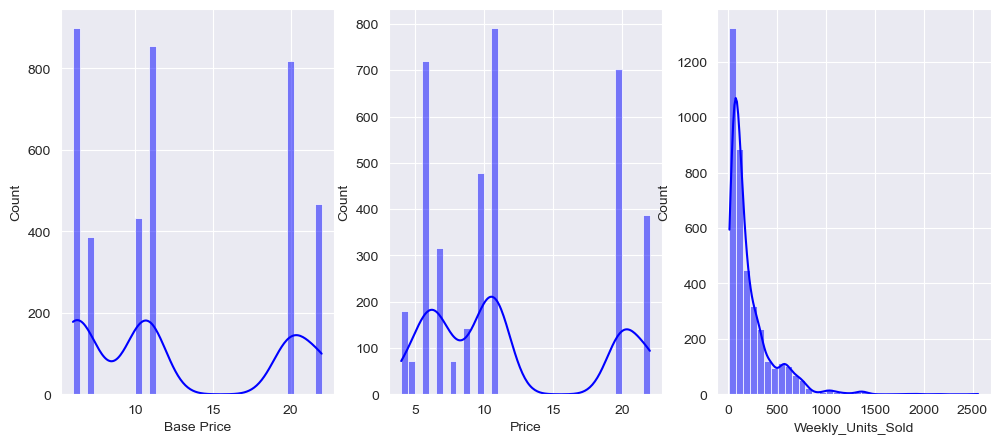

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot(df['Base Price'], kde=True, bins=int(180/5), ax=axes[0], color = 'blue')
sns.histplot(df['Price'], stat='count', kde=True, bins=int(180/5), ax=axes[1], color = 'blue')
sns.histplot(df['Weekly_Units_Sold'], kde=True, bins=int(180/5), ax=axes[2], color = 'blue')

These distributions are not too worrying, as they only have a few price points and only a few weeks of high sales.

<Axes: >

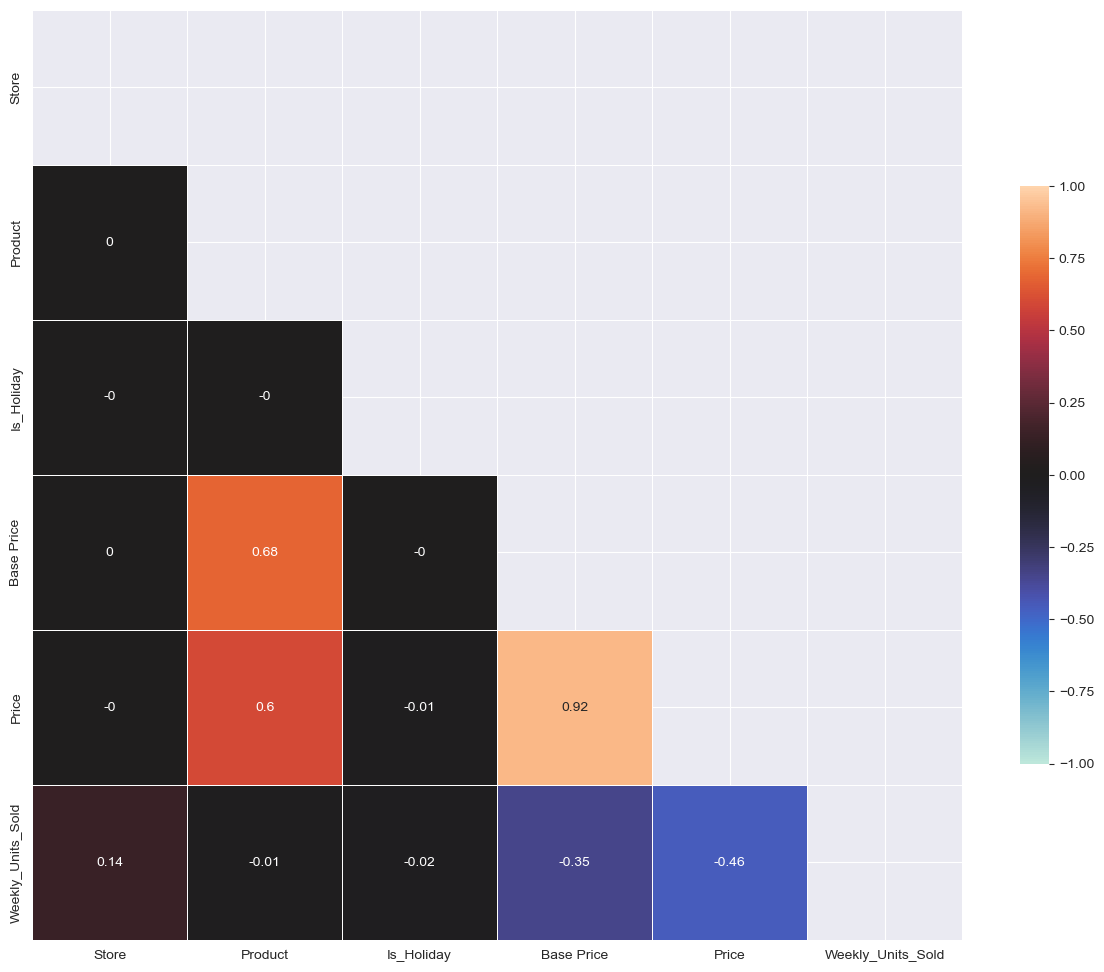

In [27]:
corr = df.corr(method="pearson").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.color_palette('icefire', as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
lower_q = df['Weekly_Units_Sold'].quantile(0.25)
upper_q = df['Weekly_Units_Sold'].quantile(0.75)
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
outliers = df['Weekly_Units_Sold'][(df['Weekly_Units_Sold'] < lower_bound) | (df['Weekly_Units_Sold'] > upper_bound)]
print(df['Weekly_Units_Sold'].mean())
print(outliers.mean())
print(outliers.count())

215.95260295260294
829.2913907284768
302


These two modules make html reports that are quite good and can supplement for an EDA if the EDA is not available.
In addition, I chose them because they do a good Time Series analysis and export it.

In [29]:
profile_y = ydata_prof(df, title="Initial EDA")
profile_y.to_file("basic_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
profile_pd = pd_prof(df, tsmode=True, sortby="Date", title='Time Series EDA')
profile_pd.to_file("time_series_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]